In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
np.random.seed(0)

In [11]:
iris_train = pd.read_csv('train_iris.csv')
iris_train = iris_train.iloc[:, 1:]
iris_test = pd.read_csv('test_iris.csv')
iris_test = iris_test.iloc[:, 1:]

In [12]:
iris_test.head()

,sepal length,sepal width,petal length,petal width,species
0,5.8,2.8,5.1,2.4,2
1,5.9,3.2,4.8,1.8,1
2,6.0,3.0,4.8,1.8,2
3,5.2,2.7,3.9,1.4,1
4,5.1,3.8,1.9,0.4,0


In [13]:
x_train = iris_train[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_train = iris_train.species
x_test = iris_test[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = iris_test.species

In [14]:
check_result = pd.DataFrame()
check_result

""


In [15]:
for max_depth in range(1, 101):
    my_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    my_tree.fit(x_train, y_train)
    train_score = my_tree.score(x_train, y_train)
    test_score = my_tree.score(x_test, y_test)
    one_time = pd.DataFrame({'max_depth' : [max_depth] ,'train_score' : [train_score], 'test_score' : [test_score]})
    check_result = pd.concat([check_result, one_time])

In [16]:
check_result

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94
0,99,1.00,0.92


In [17]:
check_result = pd.melt(check_result, 
                       id_vars = ['max_depth'], \
                       value_vars = ['train_score', 'test_score'], \
                       var_name = 'set_type', value_name = 'score')

<Axes: xlabel='max_depth', ylabel='score'>

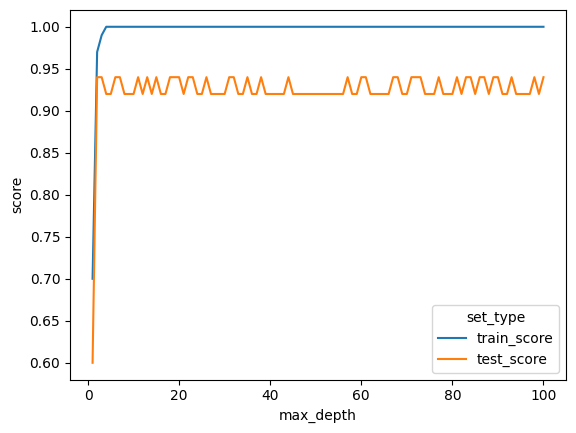

In [18]:

sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = check_result)